# Exercixe 2.3 - Random Forest with optimized parameters for Ljubljana (all years)

## Contents:

##### 1. Importing Libraries and Data
##### 2. Data Wrangling
##### 3. Reshaping for modeling
##### 4. Splitting Data
##### 5. Hyperparameter Optimization
##### 6. Random Forest Model with optimized parameters
##### 7. Feature Importances

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
# Create Path

path = r'C:\Users\lisad\OneDrive\Homework\Machine Learning with Python\Achievement 2'

In [3]:
# Import cleaned weather data

X = pd.read_csv(os.path.join(path, 'Data Sets', 'unscaled_weather_cleaned_withdate.csv'), index_col = False)

In [4]:
# Check

X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30

In [5]:
# Check shape

X.shape

(22950, 137)

In [6]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data Sets', 'Pleasant_Weather.csv'), index_col = False)

In [7]:
# Check

answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check shape

answers.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to Ljubljana station only

In [9]:
# Create a list of the columns containing "Ljubljana" in their names

ljubljana_list = list(x for x in X.columns if x.find('LJUBLJANA') >=0)
ljubljana_list

['LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max']

In [10]:
# Create a dataframe with those columns

df_ljubljana = X[ljubljana_list]
df_ljubljana

,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max
0,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5
1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5
2,8,0.96,1.0173,0.20,0.12,0.0,4.6,0.9,6.3
3,6,0.94,1.0173,0.49,0.00,2.2,3.2,1.0,7.0
4,7,0.94,1.0173,0.20,0.00,0.0,3.6,0.4,4.8
...,...,...,...,...,...,...,...,...,...
22945,4,0.80,1.0289,1.35,0.37,5.9,14.7,12.1,21.1
22946,3,0.82,1.0291,1.35,0.37,4.5,12.9,9.8,19.8
22947,3,0.81,1.0270,1.35,0.37,5.1,13.2,10.2,20.7
22948,3,0.77,1.0238,1.35,0.37,5.7,14.0,10.0,23.1


In [11]:
# Reduce answers dataset to Ljubljana's answers only

answers_ljubljana = answers['LJUBLJANA_pleasant_weather']
answers_ljubljana

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: LJUBLJANA_pleasant_weather, Length: 22950, dtype: int64

In [12]:
df_ljubljana.shape # observations dataset has the correct shape

(22950, 9)

In [13]:
answers_ljubljana.shape # predictions dataset has the correct shape

(22950,)

## 3. Reshaping for modeling

In [14]:
X2 = df_ljubljana

In [15]:
y2 = answers_ljubljana

In [16]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [17]:
X.shape

(22950, 9)

In [18]:
y.shape

(22950,)

## 4. Splitting data

In [19]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [21]:
X_train

array([[ 6.    ,  0.76  ,  1.0128, ..., 19.2   , 14.2   , 26.8   ],
       [ 2.    ,  0.83  ,  1.02  , ..., -4.4   , -8.2   , -1.3   ],
       [ 8.    ,  0.95  ,  1.0121, ...,  0.6   , -0.6   ,  1.2   ],
       ...,
       [ 8.    ,  0.96  ,  1.0172, ...,  8.9   ,  6.7   , 12.    ],
       [ 6.    ,  0.74  ,  1.0122, ..., 15.8   , 13.4   , 21.    ],
       [ 6.    ,  0.73  ,  1.0168, ..., 11.9   ,  5.4   , 19.8   ]],
      shape=(17212, 9))

In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 0], shape=(17212,))

In [23]:
X_test

array([[ 8.    ,  0.88  ,  1.0149, ..., 18.5   , 15.    , 24.8   ],
       [ 7.    ,  0.7   ,  1.0227, ..., -1.    , -4.8   ,  2.    ],
       [ 6.    ,  0.88  ,  1.0108, ..., 18.7   , 15.1   , 21.4   ],
       ...,
       [ 2.    ,  0.86  ,  1.0203, ...,  8.5   ,  4.    , 17.8   ],
       [ 2.    ,  0.57  ,  1.0222, ..., 10.2   ,  3.    , 18.2   ],
       [ 1.    ,  0.49  ,  1.0142, ..., 24.3   , 16.5   , 31.7   ]],
      shape=(5738, 9))

In [24]:
y_test

array([0, 0, 0, ..., 0, 1, 0], shape=(5738,))

## 5. Hyperparameter Optimization

### Grid Search

In [27]:
# Create a RF classifier

clf = RandomForestClassifier()

In [28]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [29]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 1.9056286414464314 minutes


In [30]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


### Random Search

In [31]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [32]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [33]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 1.747360062599182 minutes


In [34]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': np.int64(6), 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': np.int64(2), 'n_estimators': np.int64(150)}
Best RANDOM search score is: 1.0


In [35]:
# Grid search results vs Random search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': np.int64(6), 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': np.int64(2), 'n_estimators': np.int64(150)}
Best RANDOM search score is: 1.0


#### Grid search and Random search resulted in the same best search score!

## 6. Random Forest Model using optimized parameters

In [40]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = np.int64(150), max_depth=np.int64(6), max_features=4, min_samples_leaf=1, min_samples_split=np.int64(2), criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

,n_estimators,np.int64(150)
,criterion,'entropy'
,max_depth,np.int64(6)
,min_samples_split,np.int64(2)
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


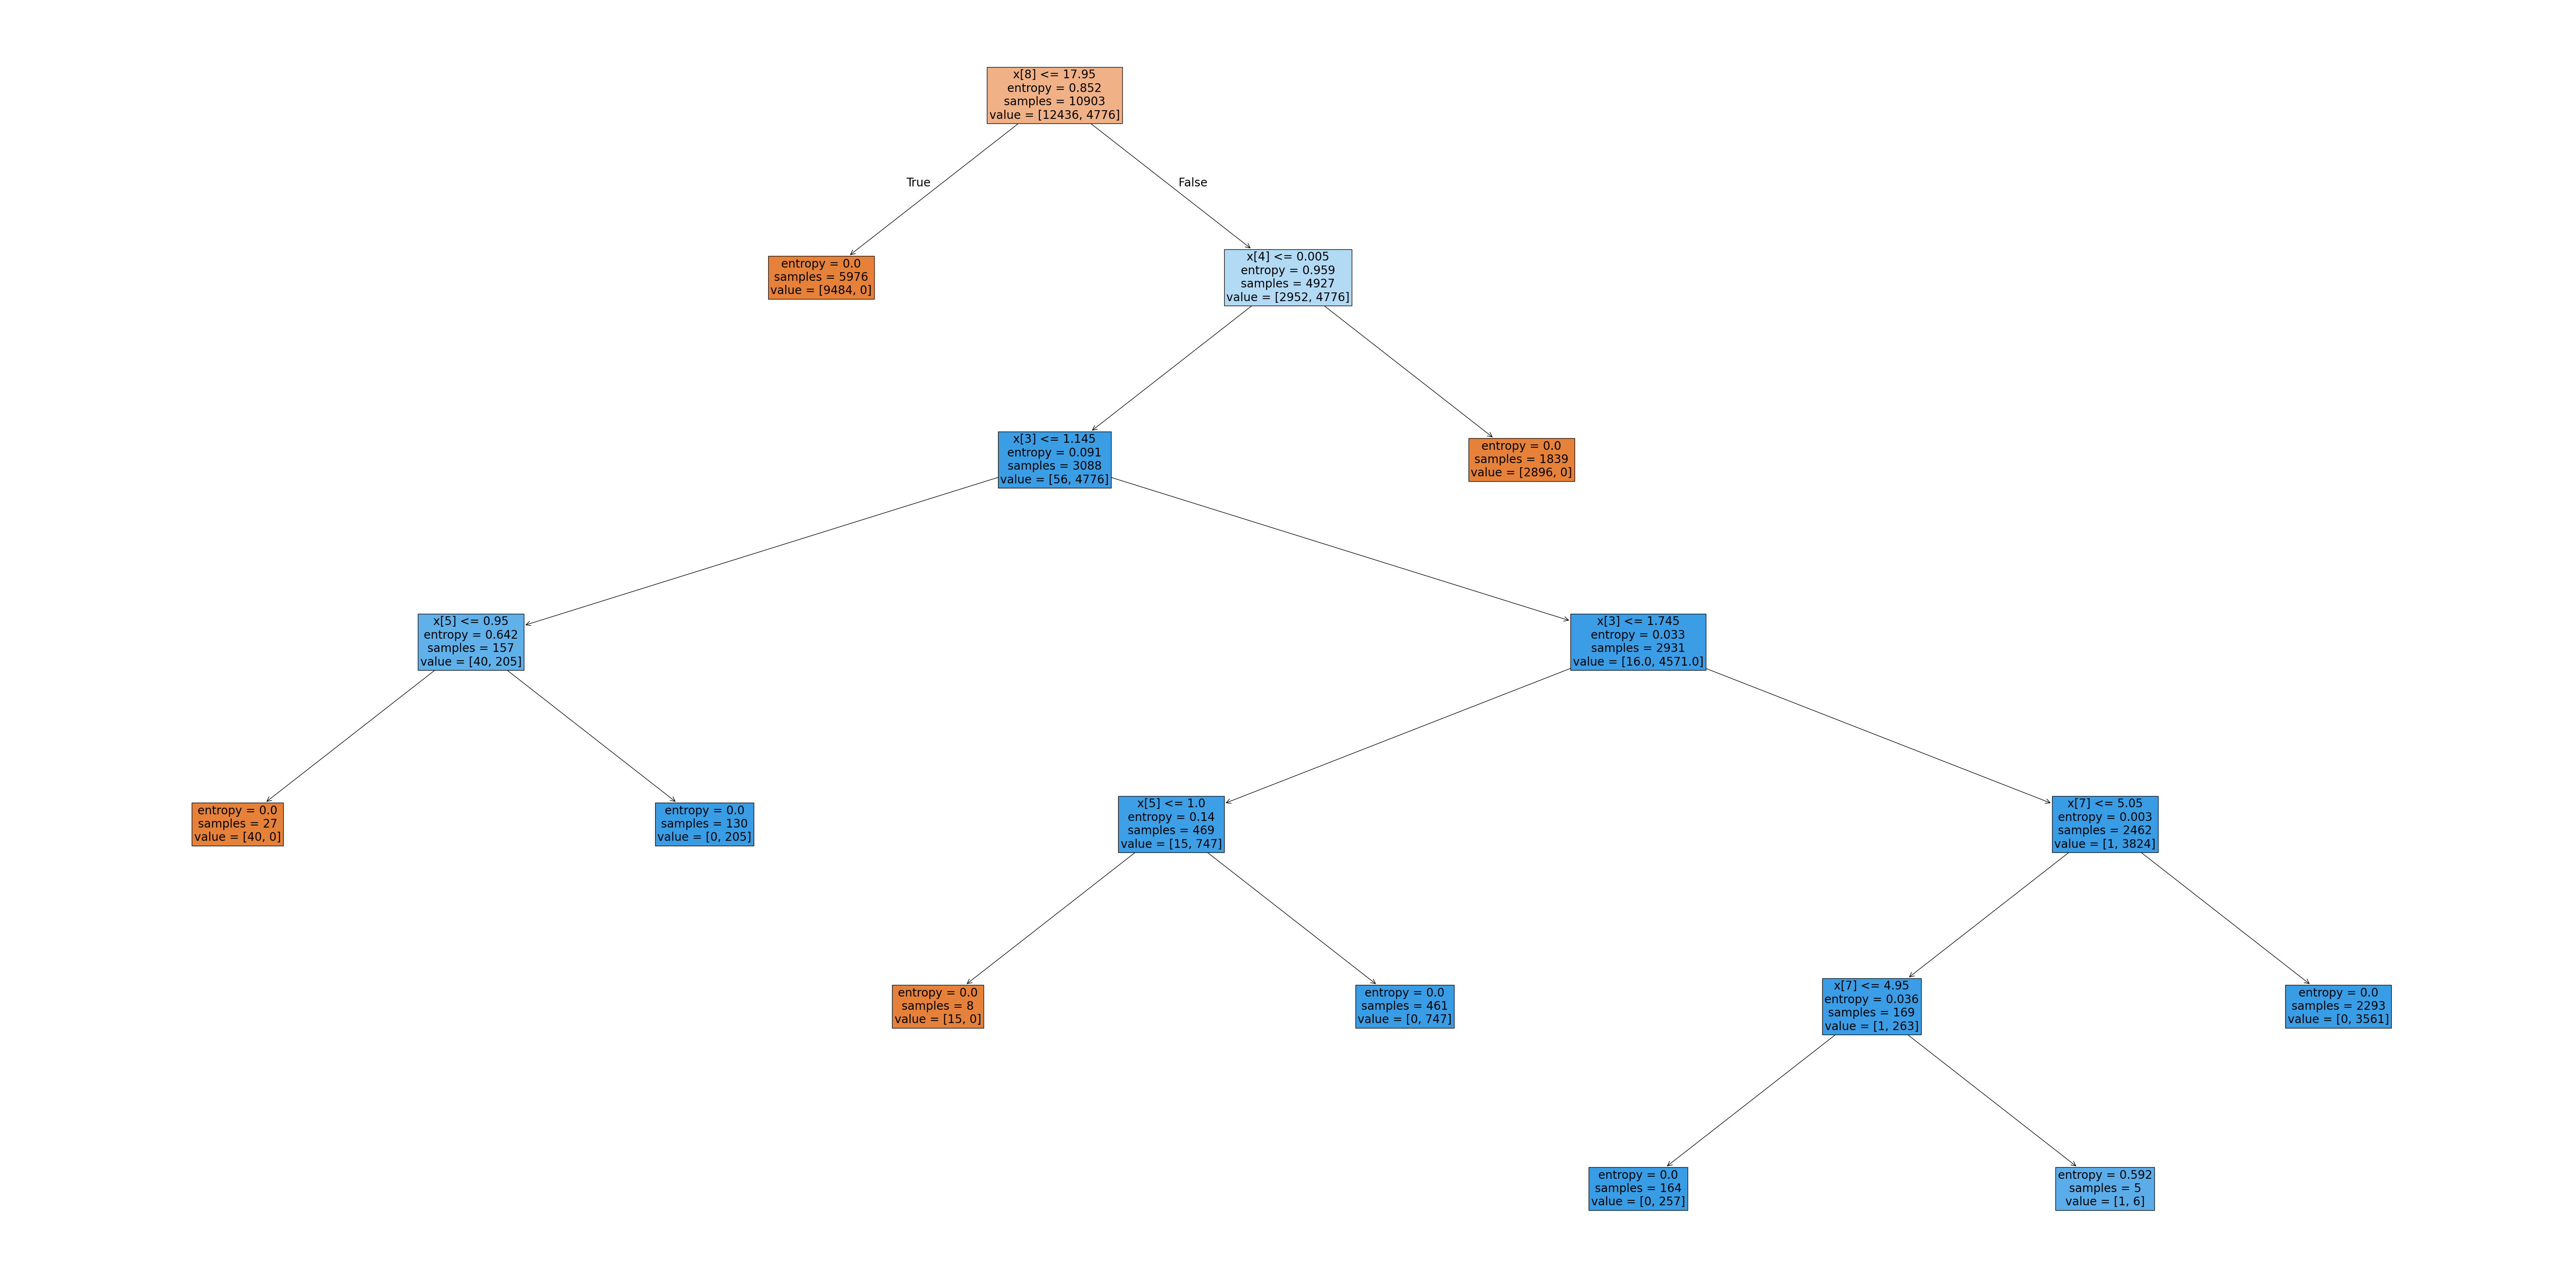

In [42]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, filled=True);

In [43]:
fig.savefig(os.path.join(path, 'Visualizations', 'rf_optimized_ljubljana.png'),bbox_inches='tight')

## 7. Uncovering Feature Importances

In [44]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.03485397, 0.00525281, 0.00347898, 0.05071576, 0.3790079 ,
       0.04125083, 0.10233004, 0.00836907, 0.37474065])

In [45]:
# Create a list of weather features

wx_list = [feature.replace('LJUBLJANA_', '') for feature in ljubljana_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [46]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.034854
humidity            0.005253
pressure            0.003479
global_radiation    0.050716
precipitation       0.379008
sunshine            0.041251
temp_mean           0.102330
temp_min            0.008369
temp_max            0.374741
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


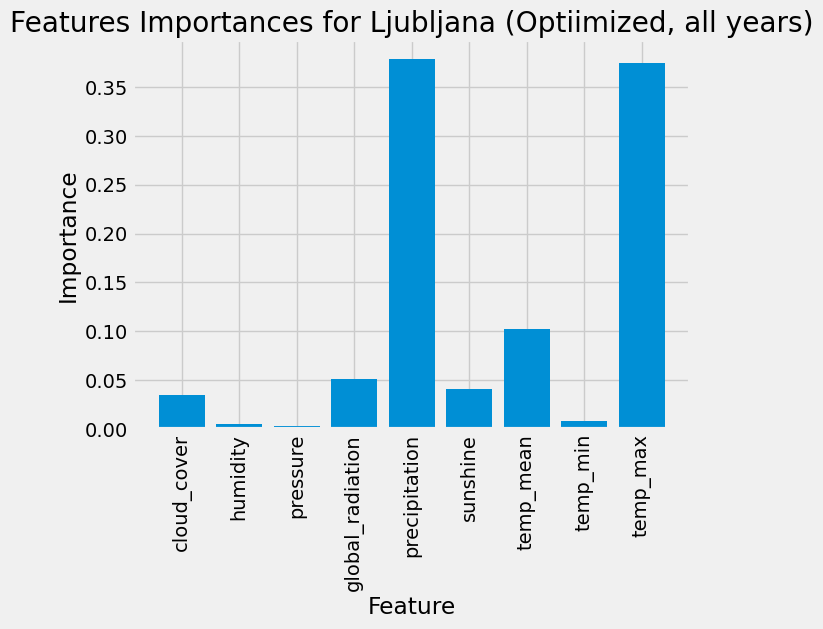

In [47]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Ljubljana (Optiimized, all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'optimized_ljubljana_feature_importances.png'), bbox_inches='tight')
plt.show()